In [5]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import Toolkit_01 as ml
from sklearn.decomposition import PCA

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
init_data = pd.read_csv("AdmissionPredict.csv")

data = init_data.dropna()


def to_str(x):
    if x > 0.78:
        return "high"
    elif x > 0.50:
        return "normal"
    else:
        return "low"


data["str chance"] = data["Chance of Admit"].apply(lambda x: to_str(x))
data

C:\Users\keipj\AppData\Local\Temp\ipykernel_16324\4148447108.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["str chance"] = data["Chance of Admit"].apply(lambda x: to_str(x))


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,str chance
0,1,337.0,118.0,4,4.5,4.5,9.65,1,0.92,high
4,5,314.0,103.0,2,2.0,3.0,8.21,0,0.65,normal
5,6,330.0,115.0,5,4.5,3.0,9.34,1,0.90,high
7,8,308.0,101.0,2,3.0,4.0,7.90,0,0.68,normal
8,9,302.0,102.0,1,2.0,1.5,8.00,0,0.50,low
...,...,...,...,...,...,...,...,...,...,...
394,395,329.0,111.0,4,4.5,4.0,9.23,1,0.89,high
395,396,324.0,110.0,3,3.5,3.5,9.04,1,0.82,high
397,398,330.0,116.0,4,5.0,4.5,9.45,1,0.91,high
398,399,312.0,103.0,3,3.5,4.0,8.78,0,0.67,normal


In [3]:
data_x = data.drop(["Serial No.", "Chance of Admit", 'str chance'], axis=1)
y = data["str chance"]

In [10]:
data_train, data_test, y_train, y_test = ml.split_scale(data_x, y, random_state=1)

model = SVC()
print(f"kernel = {model.kernel}\nC(Regularization parameter) = {model.C}\ngamma = {model.gamma}")
model.fit(data_train, y_train)
acc = model.score(data_test, y_test)
print(f"accuracy is : {acc:.2f} %")

kernel = rbf
C(Regularization parameter) = 10
gamma = scale
accuracy is : 0.86 %


In [11]:
pca = PCA(n_components=2)
data_2d = pd.DataFrame(pca.fit_transform(data_train))
data_2d["str chance"] = y_train

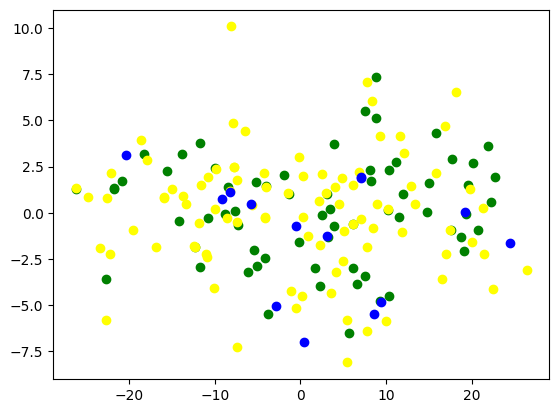

In [12]:
plt.scatter(data_2d[data_2d["str chance"] == "high"].iloc[:, 0],
            data_2d[data_2d["str chance"] == "high"].iloc[:, 1], color="green", marker="o")
plt.scatter(data_2d[data_2d["str chance"] == "normal"].iloc[:, 0],
            data_2d[data_2d["str chance"] == "normal"].iloc[:, 1], color="yellow", marker="o")
plt.scatter(data_2d[data_2d["str chance"] == "low"].iloc[:, 0],
            data_2d[data_2d["str chance"] == "low"].iloc[:, 1], color="blue", marker="o")

plt.show()


In [13]:
df = pd.DataFrame(data_train)
df["str"] = y_train
df1 = df[df.str == "high"]
df2 = df[df.str == "normal"]
df3 = df[df.str == "low"]

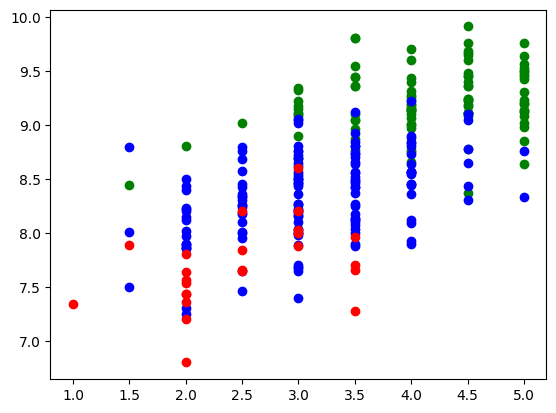

In [14]:
plt.clf()
plt.scatter(df1.iloc[:, 4], df1.iloc[:, 5], color="green", marker="o")
plt.scatter(df2.iloc[:, 4], df2.iloc[:, 5], color="blue", marker="o")
plt.scatter(df3.iloc[:, 4], df3.iloc[:, 5], color="red", marker="o")
plt.show()

In [16]:
print(model.predict([[340, 120, 5, 4, 4, 9, 1]])[0])
print(model.predict([[315, 110, 5, 4, 4, 9, 1]])[0])
print(model.predict([[290, 80, 1, 1, 1, 1, 0]])[0])

high
high
normal
normal
normal


D:\All Python\Summer Project\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
D:\All Python\Summer Project\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
D:\All Python\Summer Project\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
D:\All Python\Summer Project\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
D:\All Python\Summer Project\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Seccond Way to do that... almost the same

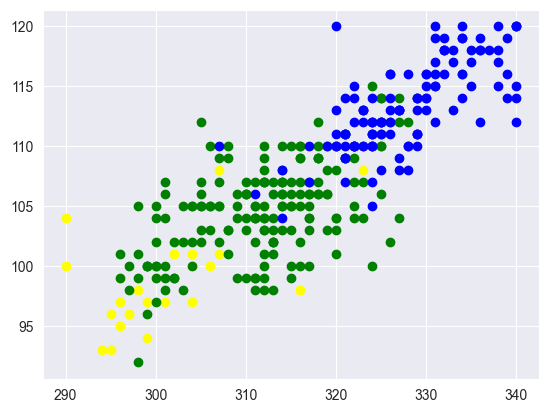

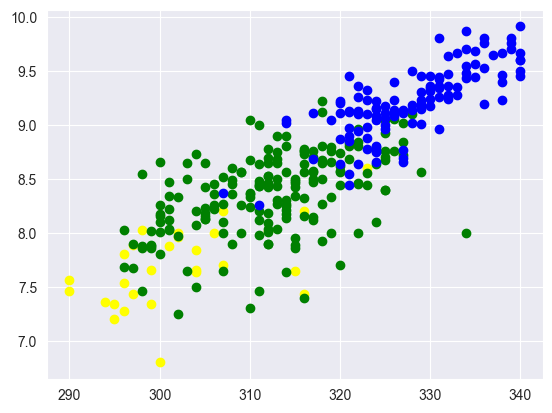

In [141]:
df = init_data.copy()


def to_str(x):
    if x > 0.78:
        return 3
    elif x > 0.50:
        return 2
    else:
        return 1


df = df.dropna()

df["chance"] = df["Chance of Admit"].apply(lambda x: to_str(x))

df0 = df[df.chance == 1]
df1 = df[df.chance == 2]
df2 = df[df.chance == 3]

plt.scatter(df0["GRE Score"], df0["TOEFL Score"], color="yellow", marker="o")
plt.scatter(df1["GRE Score"], df1["TOEFL Score"], color="green", marker="o")
plt.scatter(df2["GRE Score"], df2["TOEFL Score"], color="blue", marker="o")
plt.show()

plt.scatter(df0["GRE Score"], df0["CGPA"], color="yellow", marker="o")
plt.scatter(df1["GRE Score"], df1["CGPA"], color="green", marker="o")
plt.scatter(df2["GRE Score"], df2["CGPA"], color="blue", marker="o")
plt.show()

In [142]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

target = df.chance
X = df.drop(["Chance of Admit", "chance", "Serial No."], axis="columns")
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = SVC(C=30)
model.fit(X_train, y_train)

print(model.C)
print(model.gamma)
print(model.kernel)
print(model.score(X_test, y_test))


30
scale
rbf
0.8484848484848485


In [143]:
print(model.predict([[340, 120, 5, 4.5, 4.5, 9.6, 1]])[0])
print(model.predict([[340, 120, 5, 4, 4, 9, 1]])[0])
print(model.predict([[315, 110, 5, 4, 4, 9, 1]])[0])
print(model.predict([[290, 80, 1, 1, 1, 1, 0]])[0])
print(model.predict([[304, 100, 4, 1.5, 2.5, 7.84, 0]])[0])


3
3
2
2
2


D:\All Python\Summer Project\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
D:\All Python\Summer Project\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
D:\All Python\Summer Project\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
D:\All Python\Summer Project\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
D:\All Python\Summer Project\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
